In [1]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sys.path.append("..")
from src.data_loader import load_data
df = load_data("../Data/email_table.csv", "../Data/email_opened_table.csv", "../Data/link_clicked_table.csv")
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


What percentage of users opened the email and what percentage clicked on the link within the email?


In [ ]:
total_emails = len(df)
emails_opened = df['opened'].sum()
links_clicked = df['clicked'].sum()

# Calculate rates
open_rate = (emails_opened / total_emails) * 100
ctr = (links_clicked / total_emails) * 100


# Calculate CTOR
ctor = (links_clicked / emails_opened) * 100 if emails_opened > 0 else 0
print(f"Click-to-Open Rate: {ctor:.2f}%")

# Create funnel chart
funnel_data = dict(
    number=[total_emails, emails_opened, links_clicked],
    stage=['Emails Sent', 'Emails Opened', 'Links Clicked']
)
fig = go.Figure(go.Funnel(
    y=funnel_data['stage'],
    x=funnel_data['number'],
    textinfo="value+percent previous"
))
fig.update_layout(title="Email Campaign Conversion Funnel")
fig.show()

'''Calculates the percentage of emails opened out of those sent.
Formula: (Number of Opened Emails / Total Emails) * 100.'''
'''Calculates the click-through rate, the percentage of emails that resulted in a link click out of those sent.
Formula: (Number of Clicks / Total Emails) * 100.'''
'''Calculate Click-to-Open Rate (CTOR)
ctor = (links_clicked / emails_opened) * 100 if emails_opened > 0 else 0:
Calculates the percentage of opened emails that resulted in a link click.
Formula: (Number of Clicks / Number of Opened Emails) * 100.'''

Click-to-Open Rate: 20.48%


Personalization vs Click Rate

C:\Users\kalya\AppData\Local\Temp\ipykernel_1448\3974527231.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\kalya\AppData\Local\Temp\ipykernel_1448\3974527231.py:5: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



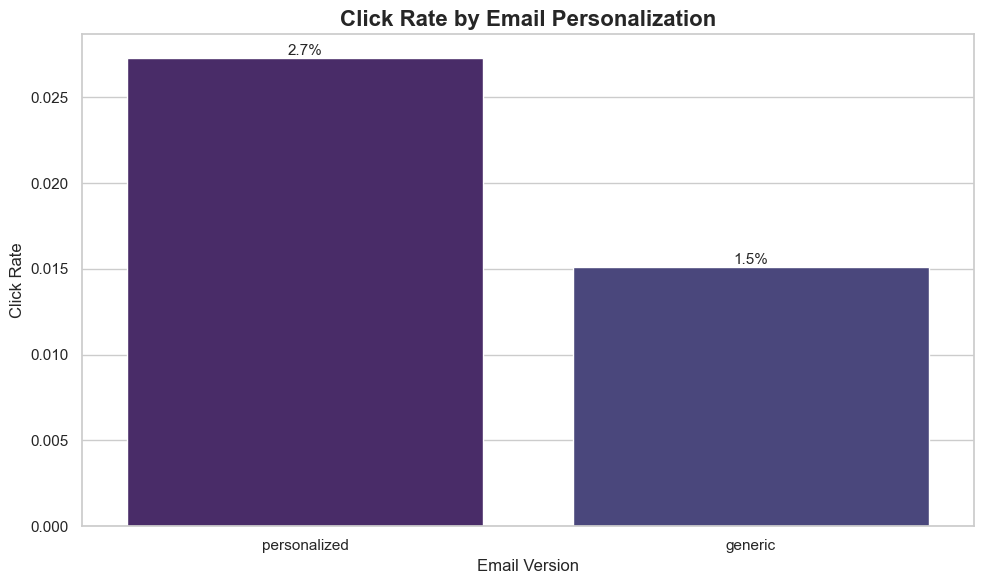

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
colors = sns.color_palette("viridis", 10)
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x="email_version", y="clicked", data=df, palette=colors[:3], errorbar=None)
plt.title("Click Rate by Email Personalization", fontsize=16, fontweight='bold')
plt.xlabel("Email Version", fontsize=12)
plt.ylabel("Click Rate", fontsize=12)
# Add percentages on top of bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=11)
plt.tight_layout()
plt.show()

Weekday vs Click Rate

C:\Users\kalya\AppData\Local\Temp\ipykernel_1448\2320852806.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




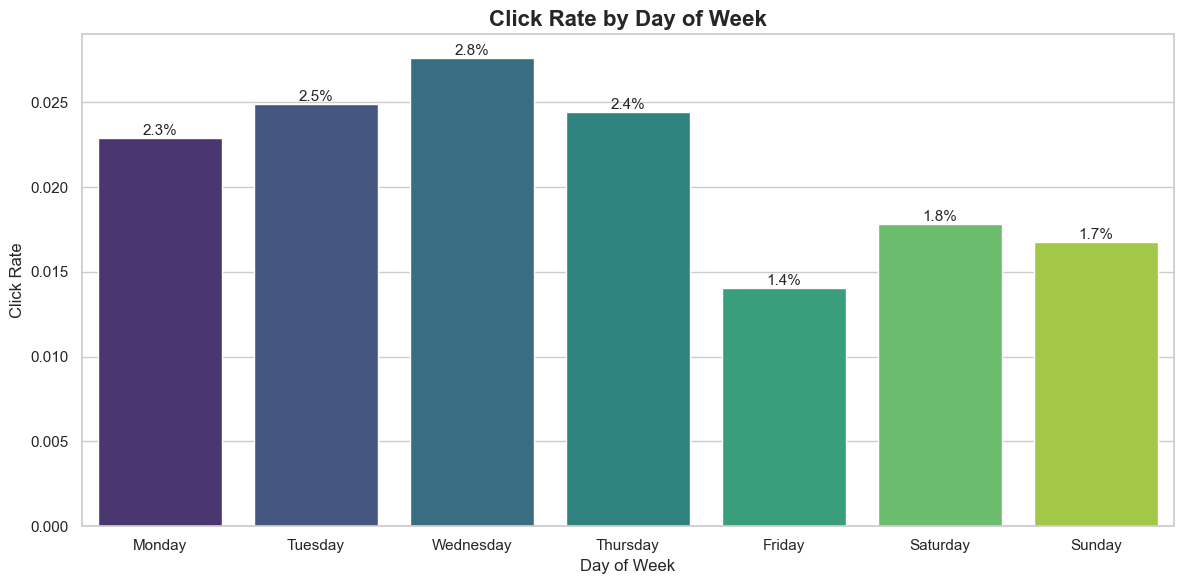

In [4]:
plt.figure(figsize=(12, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax2 = sns.barplot(x="weekday", y="clicked", data=df, order=weekday_order, 
                 palette=sns.color_palette("viridis", 7), errorbar=None)
plt.title("Click Rate by Day of Week", fontsize=16, fontweight='bold')
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Click Rate", fontsize=12)
# Add percentages on top of bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=11)
plt.tight_layout()
plt.show()

Wednesday has the highest click rate at 2.8%, followed by Tuesday (2.5%) and Thursday (2.4%).

Friday, Saturday, and Sunday show lower engagement rates.

 Insight: Mid-week emails perform better in terms of clicks. Avoid Fridays and weekends for important campaigns.

Hour Sent vs Click Rate

C:\Users\kalya\AppData\Local\Temp\ipykernel_1448\2557252975.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




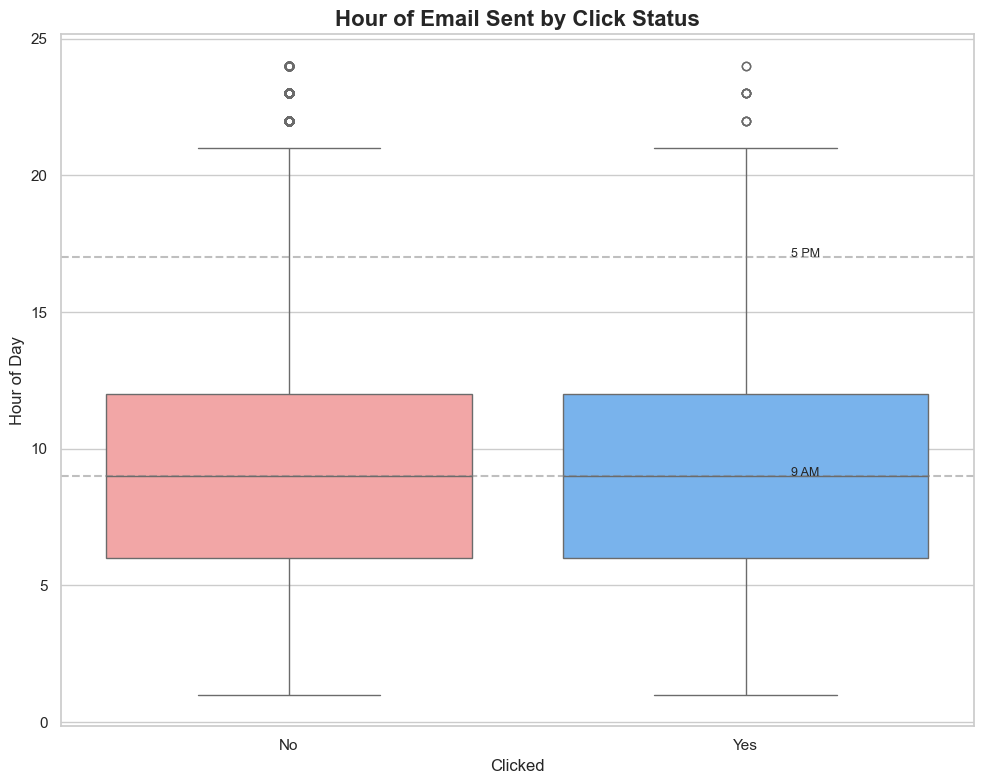

In [5]:
plt.figure(figsize=(10, 8))
ax3 = sns.boxplot(x="clicked", y="hour", data=df, palette=["#ff9999", "#66b3ff"])
plt.title("Hour of Email Sent by Click Status", fontsize=16, fontweight='bold')
plt.xlabel("Clicked", fontsize=12)
plt.ylabel("Hour of Day", fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
# Add a horizontal line for business hours reference
plt.axhline(y=9, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=17, color='gray', linestyle='--', alpha=0.5)
plt.text(1.1, 9, '9 AM', fontsize=9)
plt.text(1.1, 17, '5 PM', fontsize=9)
plt.tight_layout()
plt.show()

The median send time for clicked emails is 9 AM, while for non-clicked emails, it’s slightly later.

Clicked emails are more concentrated around morning hours, especially between 6 AM and noon.

The distribution for non-clicked emails is slightly more spread out with some outliers toward late afternoon and evening.

💡 Insight: Emails sent in the early morning hours (especially around 9 AM) are more likely to result in clicks, suggesting that users are more engaged during the start of their day.

User Past Purchase Vs Click Rate

C:\Users\kalya\AppData\Local\Temp\ipykernel_1448\1389222653.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




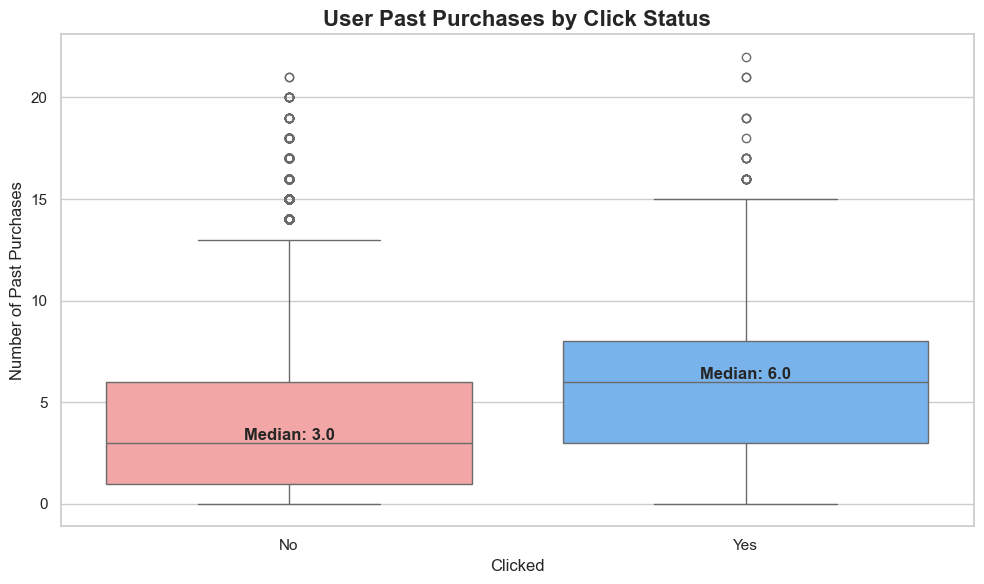

In [6]:
plt.figure(figsize=(10, 6))
ax4 = sns.boxplot(x='clicked', y='user_past_purchases', data=df, palette=["#ff9999", "#66b3ff"])
plt.title('User Past Purchases by Click Status', fontsize=16, fontweight='bold')
plt.xlabel('Clicked', fontsize=12)
plt.ylabel('Number of Past Purchases', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])

# Add median values on the boxplot
for i, box in enumerate([0, 1]):
    median = df[df['clicked'] == box]['user_past_purchases'].median()
    plt.text(i, median, f'Median: {median:.1f}', 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontweight='bold')

plt.tight_layout()
plt.show()


The clicked users generally have more past purchases, suggesting:

Users with more purchase history are more likely to click ads.

A potentially strong feature for modeling click-through behavior.

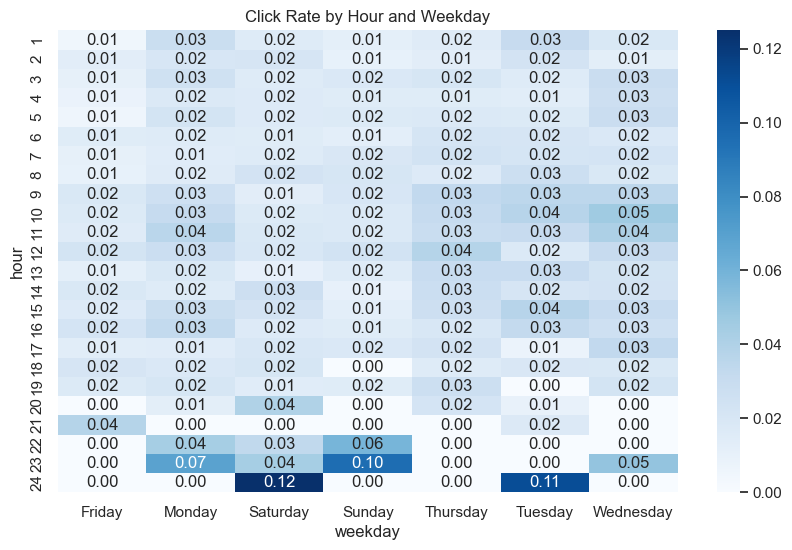

In [7]:
pivot_table = df.pivot_table(values='clicked', index='hour', columns='weekday', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='Blues')
plt.title('Click Rate by Hour and Weekday')
plt.show()

Highest click rates:

Saturday at 11 PM (0.12)

Tuesday at 11 PM (0.11)